# Quantum Computing Method - Qiskit Assignment 1
### Sharath C R (21744)

In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options
service = QiskitRuntimeService(channel="ibm_quantum")
from qiskit import *
import numpy as np
from numpy import pi
import qiskit.quantum_info as qi
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.quantum_info import random_statevector

# Problem 1(a)

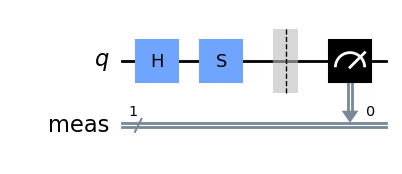

In [6]:
# 1(a)
# Define the number of qubits
n = 1

# Create a quantum circuit with 'n' qubits
circuit_a = QuantumCircuit(n)

# Apply gates to achieve the desired state |psi> = (1/sqrt(2))(|0> + i|1>)
circuit_a.h(0)  # Apply Hadamard gate
circuit_a.s(0)  # Apply S gate (pi/2 phase shift)

# Measurement
circuit_a.measure_all()

# Simulate the circuit
sim = AerSimulator()

circuit_a_compiled = transpile(circuit_a, sim)
result = sim.run(circuit_a_compiled, shots=10000).result()
counts = result.get_counts(circuit_a_compiled)

# Draw the circuit
circuit_a.draw()

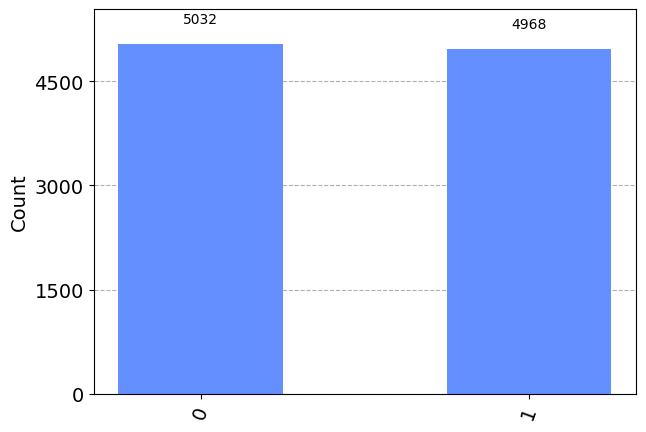

In [7]:
# Plot histogram of the measurement results
plot_histogram(counts)

# Problem 1(b)

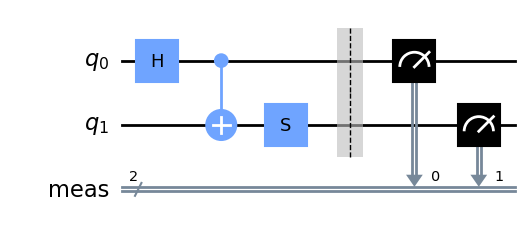

In [10]:
# 1(b)
# Define the number of qubits
n = 2

# Create a quantum circuit with 'n' qubits
circuit_b = QuantumCircuit(n)

# Apply gates to achieve the desired state |psi> = (1/sqrt(2))(|00> + i|11>)
circuit_b.h(0)  # Apply Hadamard gate to qubit 0
circuit_b.cx(0, 1)  # Apply CNOT gate to create the Bell state |ψ⁺>
circuit_b.s(1)  # Apply S gate (pi/2 phase shift) to qubit 1


# Measurement
circuit_b.measure_all()

# Simulate the circuit
sim = AerSimulator()

circuit_b_compiled = transpile(circuit_b, sim)
result = sim.run(circuit_b_compiled, shots=10000).result()
counts = result.get_counts(circuit_b_compiled)

# Draw the circuit
circuit_b.draw()

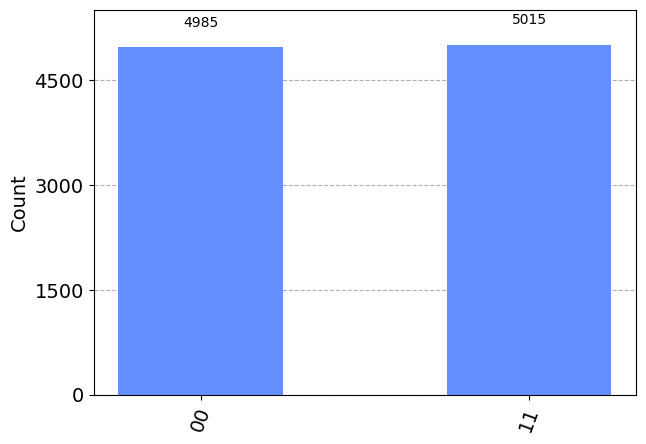

In [11]:
# Plot histogram of the measurement results
plot_histogram(counts)

# Problem 1(c)

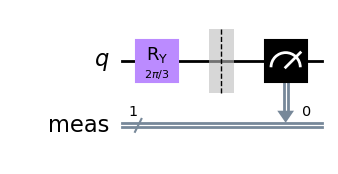

In [12]:
# 1(c)

# Define the number of qubits
n = 1

# Create a quantum circuit with 'n' qubits
circuit_c = QuantumCircuit(n)

# Apply gates to approximate the state |psi> = (1/2)(|0⟩ + sqrt(3)|1⟩)
circuit_c.ry((2*pi)/3, 0)  # Apply Rz gate with an angle (2.186 is approximately 2π * sqrt(3) / 2)

# Measurement
circuit_c.measure_all()

# Simulate the circuit
sim = AerSimulator()

circuit_c_compiled = transpile(circuit_c, sim)
result = sim.run(circuit_c_compiled, shots=10000).result()
counts = result.get_counts(circuit_c_compiled)

# Draw the circuit
circuit_c.draw()

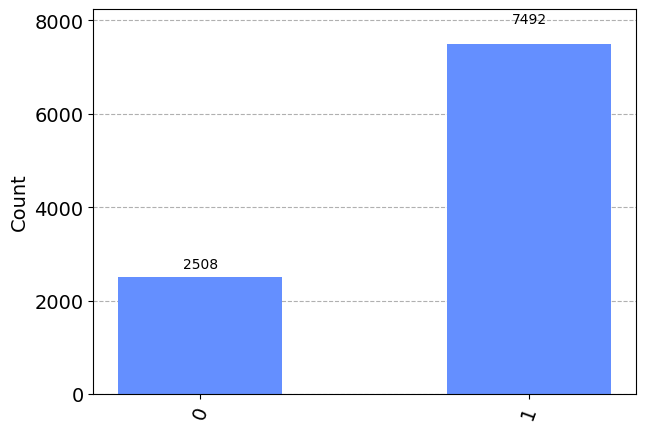

In [13]:
plot_histogram(counts)

# Problem 1(d)

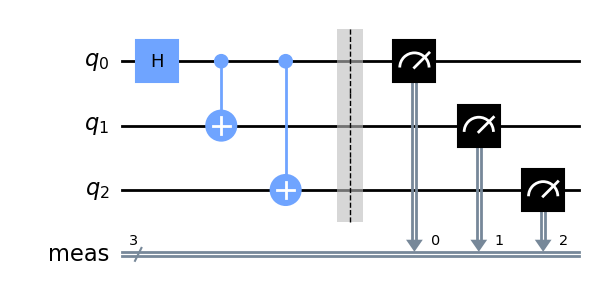

In [14]:
# 1(d)

# Define the number of qubits
n = 3

# Create a quantum circuit with 'n' qubits
circuit_d = QuantumCircuit(n)

circuit_d.h(0)  # Apply Hadamard gate to qubit 0
circuit_d.cx(0, 1)  # Apply CNOT gate with target as 2nd qubit
circuit_d.cx(0, 2)  # Apply CNOT gate with target as 3rd qubit

# Measurement
circuit_d.measure_all()

# Simulate the circuit
sim = AerSimulator()

circuit_d_compiled = transpile(circuit_d, sim)
result = sim.run(circuit_d_compiled, shots=10000).result()
counts = result.get_counts(circuit_d_compiled)

# Draw the circuit
circuit_d.draw()

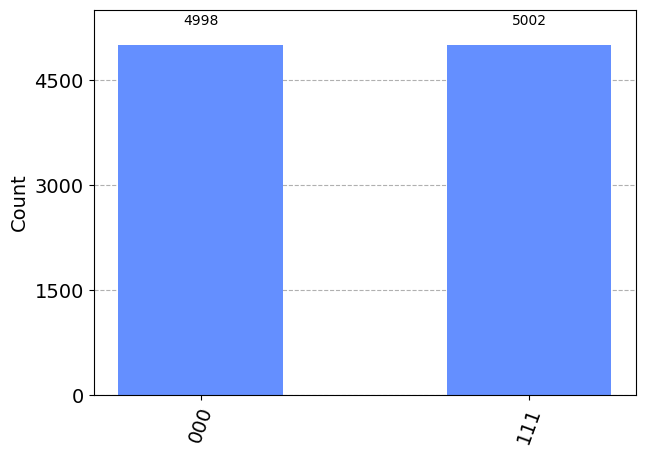

In [15]:
plot_histogram(counts)

# Problem 1(e)

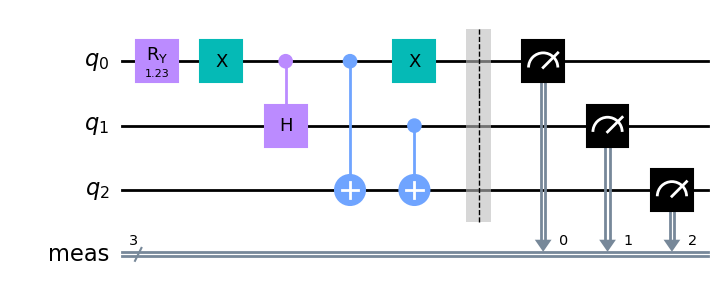

In [16]:
# 1(e)

n = 3
circuit_e = QuantumCircuit(n)

# Apply Ry(70.52877 degrees)
circuit_e.ry(1.2301, 0)

# Apply X gate on 0th qubit
circuit_e.x(0)

# Apply Controlled Hadamard on 1st qubit using 0th qubit as control
circuit_e.ch(0, 1)

# Apply controlled X gate on 2nd qubit using 0th qubit as control.
circuit_e.cx(0, 2)

# Apply controlled X gate on 2nd qubit using 1st qubit as control.
circuit_e.cx(1, 2)

# Apply X gate on 0th qubit to get back initial probability.
circuit_e.x(0)

# Measurement
circuit_e.measure_all()

# Simulate the circuit
sim = AerSimulator()

circuit_e_compiled = transpile(circuit_e, sim)
result = sim.run(circuit_e_compiled, shots=10000).result()
counts = result.get_counts(circuit_e_compiled)

# Draw the circuit
circuit_e.draw()

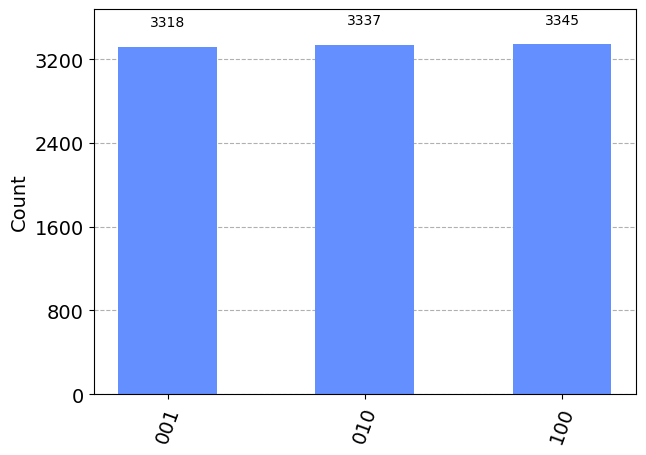

In [17]:
plot_histogram(counts)

# Problem 2(a)(1)

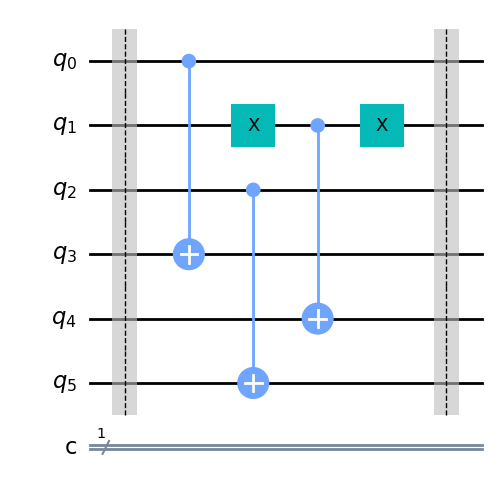

In [18]:
# 2(a)(1)

qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(1, 'c')
oracle_1 = QuantumCircuit(qreg_q, creg_c)

oracle_1.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5])
oracle_1.cx(qreg_q[0], qreg_q[3])
oracle_1.x(qreg_q[1])
oracle_1.cx(qreg_q[1], qreg_q[4])
oracle_1.x(qreg_q[1])
oracle_1.cx(qreg_q[2], qreg_q[5])
oracle_1.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5])

oracle_1.draw()

# Problem 2(a)(2)

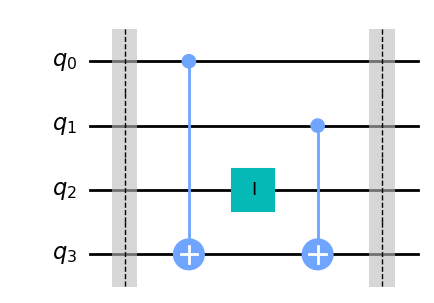

In [19]:
n = 3
s = '011'
oracle_2 = QuantumCircuit(n+1)

oracle_2.barrier()
for q in range(n):
    if s[n-1-q] == '0':
        oracle_2.i(q)
    else:
        oracle_2.cx(q, n)
oracle_2.barrier()
oracle_2.draw()

# Problem 2(a)(3)

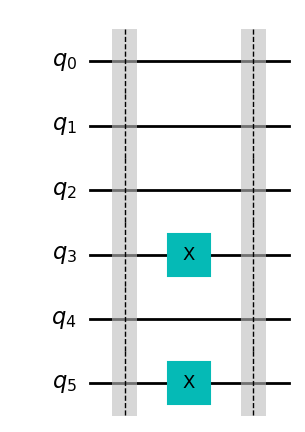

In [20]:
# Oracle 3
n = 6
oracle_3 = QuantumCircuit(n)

oracle_3.barrier()
oracle_3.x([3, 5])
oracle_3.barrier()

oracle_3.draw()

# Problem 2(b)

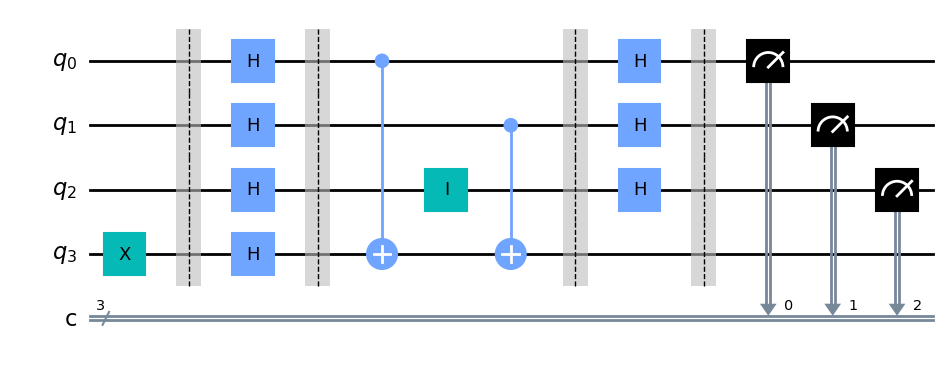

In [21]:
# Bernstein-Vazarani

n = 3
s = '011'

bersteinvazirani = QuantumCircuit(n+1, n)
bersteinvazirani.x(n)

bersteinvazirani.barrier()
for qubit in range(n+1):
    bersteinvazirani.h(qubit)

bersteinvazirani = bersteinvazirani.compose(oracle_2)
for qubit in range(n):
    bersteinvazirani.h(qubit)
bersteinvazirani.barrier()

for i in range(n):
    bersteinvazirani.measure(i, i)

bersteinvazirani.draw()

{'011': 1024}


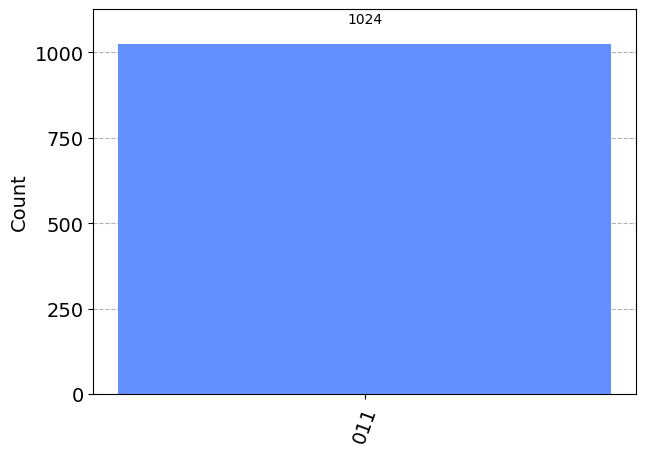

In [22]:
sim = AerSimulator()
bersteinvazirani_compiled = transpile(bersteinvazirani, sim)
result = sim.run(bersteinvazirani_compiled, shots=1024).result()
counts = result.get_counts(bersteinvazirani_compiled)
print(counts)
plot_histogram(counts)

### Bernstein-Vazirani algorithm is return the expected string

# Problem 2(c)

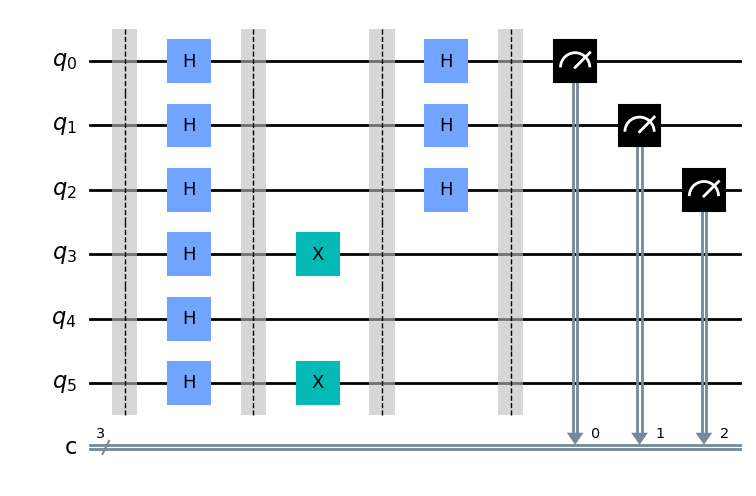

In [23]:
# Deutsch-Jozsa
n = 6
deutsch = QuantumCircuit(n, 3)

deutsch.barrier()
for qubit in range(n):
    deutsch.h(qubit)

deutsch = deutsch.compose(oracle_3)

for qubit in range(3):
    deutsch.h(qubit)
deutsch.barrier()

for i in range(3):
    deutsch.measure(i, i)
deutsch.draw()

{'000': 1024}


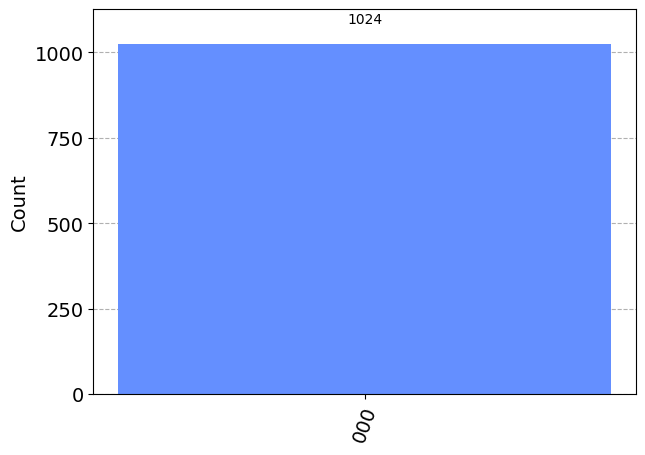

In [24]:
sim = AerSimulator()

deutsch_compiled = transpile(deutsch, sim)
result = sim.run(deutsch_compiled, shots=1024).result()
counts = result.get_counts(deutsch_compiled)
print(counts)
plot_histogram(counts)

### The oracle 3 is being detected as a constant oracle

# Problem 3

## Part a, b, c are implemented together in the below section.

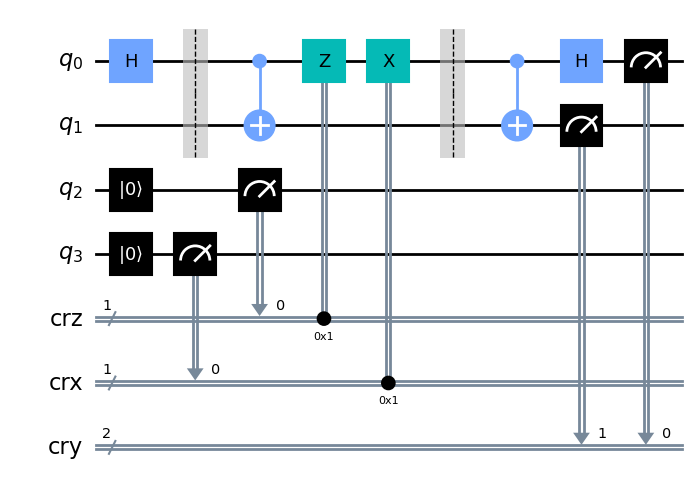

In [25]:
# Part (a) of the problem
# Initializing the phi_AB state
qreg_q = QuantumRegister(4, 'q')
creg_c0 = ClassicalRegister(1, 'crz')
creg_c1 = ClassicalRegister(1, 'crx')
creg_c2 = ClassicalRegister(2, 'cry')
circuit = QuantumCircuit(qreg_q, creg_c0, creg_c1, creg_c2)

circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
#--------------------------------------------

# Part (b) of the problem
# Initialize 2 dummy qubit to set the classical registers
# based on Alice's secret string.
s = '00'

circuit.reset(qreg_q[2])
circuit.reset(qreg_q[3])

if s[0] == '1':
    circuit.x(qreg_q[3]) # Strictly speaking this should be qreg_q[2]
if s[1] == '1':          # and 
    circuit.x(qreg_q[2]) # this should be qreg_q[3] but they are swapped
#                        # as qiskit shows the output in reverse order I
#                        # need to compensate for it.
circuit.measure(qreg_q[3], creg_c1[0])
circuit.measure(qreg_q[2], creg_c0[0])

# Apply Alice's encoding scheme based on the 
# content of the classical registers
circuit.z(qreg_q[0]).c_if(creg_c0, 1)
circuit.x(qreg_q[0]).c_if(creg_c1, 1)
circuit.barrier(qreg_q[0], qreg_q[1])
#----------------------------------------------

# Part (c) of the problem
# Apply Bob's decoding scheme
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])

# Measurement made by Bob on both his and Alice's qubit
# Store result in cry register.
circuit.measure(qreg_q[0], creg_c2[0])
circuit.measure(qreg_q[1], creg_c2[1])

circuit.draw()

{'00 0 0': 1024}


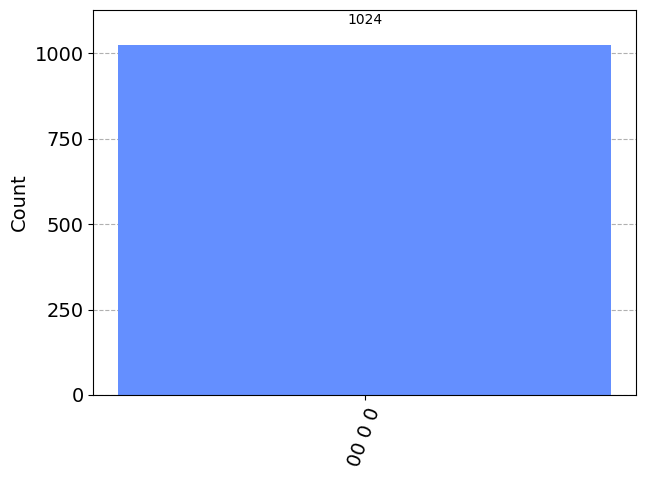

In [26]:
sim = AerSimulator()
qc_compiled = transpile(circuit, sim)
qc_compiled.save_statevector()
result = sim.run(qc_compiled, shots=1024).result()
print(result.get_counts())
plot_histogram(result.get_counts())

## Checking for other cases: 
## => i = 0; j = 1;
## => i = 1; j = 0;
## => i = 1; j = 1;

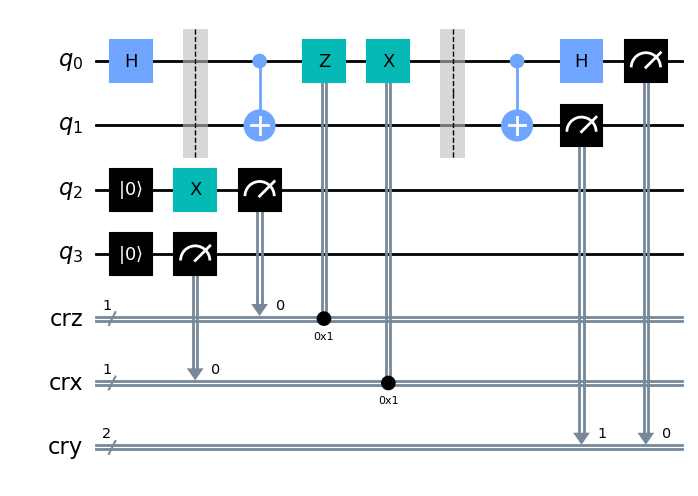

In [27]:
# i=0,j=1
s = '01'

qreg_q = QuantumRegister(4, 'q')
creg_c0 = ClassicalRegister(1, 'crz')
creg_c1 = ClassicalRegister(1, 'crx')
creg_c2 = ClassicalRegister(2, 'cry')
circuit = QuantumCircuit(qreg_q, creg_c0, creg_c1, creg_c2)
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])


circuit.reset(qreg_q[2])
circuit.reset(qreg_q[3])
if s[0] == '1':
    circuit.x(qreg_q[3])
if s[1] == '1':
    circuit.x(qreg_q[2])
circuit.measure(qreg_q[3], creg_c1[0])
circuit.measure(qreg_q[2], creg_c0[0])
circuit.z(qreg_q[0]).c_if(creg_c0, 1)
circuit.x(qreg_q[0]).c_if(creg_c1, 1)
circuit.barrier(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c2[0])
circuit.measure(qreg_q[1], creg_c2[1])

circuit.draw()

{'01 0 1': 1024}


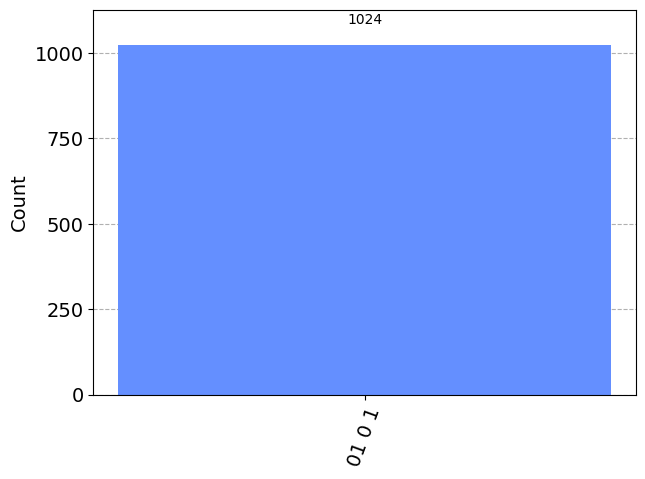

In [28]:
sim = AerSimulator()
qc_compiled = transpile(circuit, sim)
qc_compiled.save_statevector()
result = sim.run(qc_compiled, shots=1024).result()
print(result.get_counts())
plot_histogram(result.get_counts())

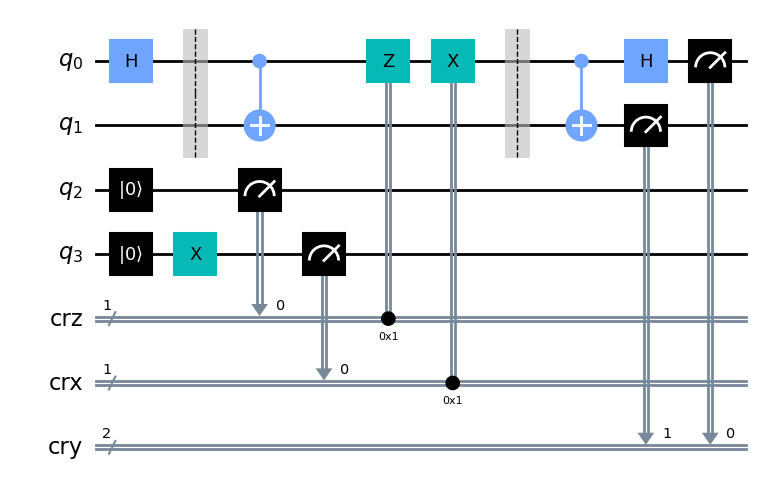

In [29]:
# i=1,j=0
s = '10'

qreg_q = QuantumRegister(4, 'q')
creg_c0 = ClassicalRegister(1, 'crz')
creg_c1 = ClassicalRegister(1, 'crx')
creg_c2 = ClassicalRegister(2, 'cry')
circuit = QuantumCircuit(qreg_q, creg_c0, creg_c1, creg_c2)
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])


circuit.reset(qreg_q[2])
circuit.reset(qreg_q[3])
if s[0] == '1':
    circuit.x(qreg_q[3])
if s[1] == '1':
    circuit.x(qreg_q[2])
circuit.measure(qreg_q[3], creg_c1[0])
circuit.measure(qreg_q[2], creg_c0[0])
circuit.z(qreg_q[0]).c_if(creg_c0, 1)
circuit.x(qreg_q[0]).c_if(creg_c1, 1)
circuit.barrier(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c2[0])
circuit.measure(qreg_q[1], creg_c2[1])

circuit.draw()

{'10 1 0': 1024}


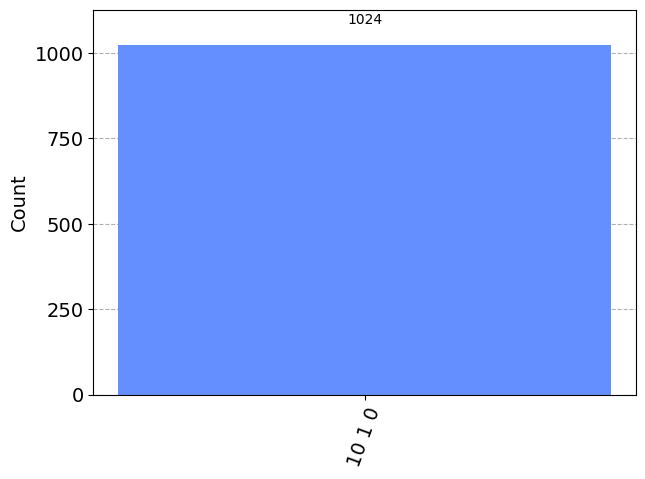

In [30]:

sim = AerSimulator()
qc_compiled = transpile(circuit, sim)
qc_compiled.save_statevector()
result = sim.run(qc_compiled, shots=1024).result()
print(result.get_counts())
plot_histogram(result.get_counts())

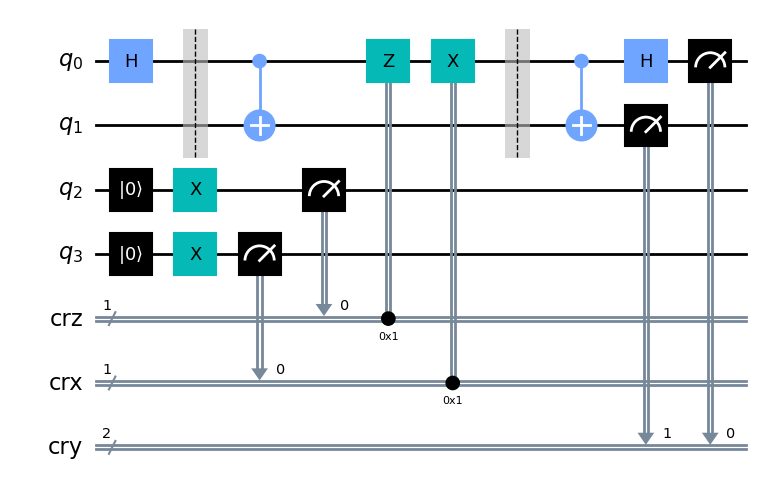

In [31]:
# i=1,j=0
s = '11'

qreg_q = QuantumRegister(4, 'q')
creg_c0 = ClassicalRegister(1, 'crz')
creg_c1 = ClassicalRegister(1, 'crx')
creg_c2 = ClassicalRegister(2, 'cry')
circuit = QuantumCircuit(qreg_q, creg_c0, creg_c1, creg_c2)
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])


circuit.reset(qreg_q[2])
circuit.reset(qreg_q[3])
if s[0] == '1':
    circuit.x(qreg_q[3])
if s[1] == '1':
    circuit.x(qreg_q[2])
circuit.measure(qreg_q[3], creg_c1[0])
circuit.measure(qreg_q[2], creg_c0[0])
circuit.z(qreg_q[0]).c_if(creg_c0, 1)
circuit.x(qreg_q[0]).c_if(creg_c1, 1)
circuit.barrier(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c2[0])
circuit.measure(qreg_q[1], creg_c2[1])

circuit.draw()

{'11 1 1': 1024}


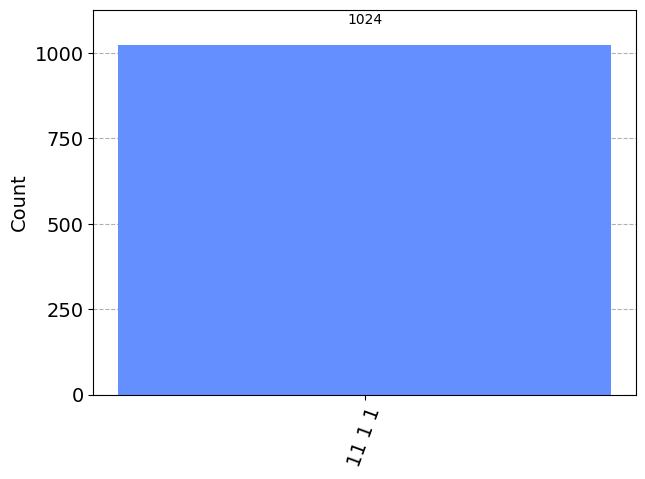

In [32]:
sim = AerSimulator()
qc_compiled = transpile(circuit, sim)
qc_compiled.save_statevector()
result = sim.run(qc_compiled, shots=1024).result()
print(result.get_counts())
plot_histogram(result.get_counts())

# Problem 4(a)

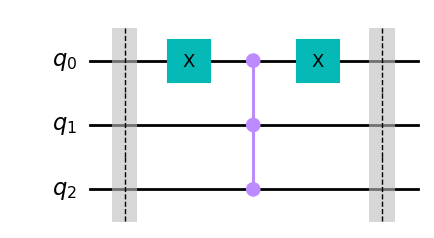

In [33]:
# Oracle 1 for f_1(x)
n=3
grover_oracle_1 = QuantumCircuit(n)
grover_oracle_1.barrier()
grover_oracle_1.x(0)
grover_oracle_1.ccz(0, 1, 2)
grover_oracle_1.x(0)
grover_oracle_1.barrier()
grover_oracle_1.draw()

In [34]:
op = qi.Operator(grover_oracle_1)
array_to_latex(op)

<IPython.core.display.Latex object>

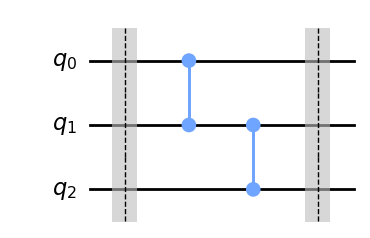

In [35]:
# Oracle 2 for f_2(x)
n=3
grover_oracle_2 = QuantumCircuit(n)
grover_oracle_2.barrier()
grover_oracle_2.cz(0, 1)
grover_oracle_2.cz(1, 2)
grover_oracle_2.barrier()
grover_oracle_2.draw()

In [36]:
op = qi.Operator(grover_oracle_2)
array_to_latex(op)

<IPython.core.display.Latex object>

# Problem 4(b)

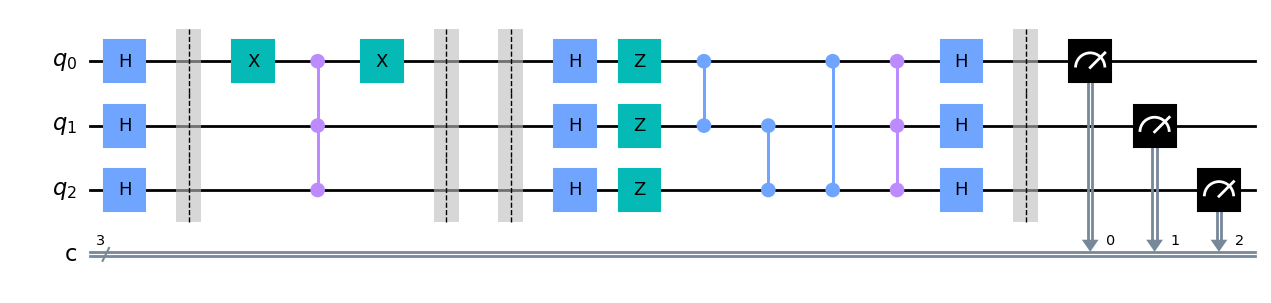

In [37]:
# Grovers algo for U_f_1|x>
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

# Diffusion circuit
grover_diffusion = QuantumCircuit(n)
grover_diffusion.barrier()
grover_diffusion.h(range(n))
grover_diffusion.z([0,1,2])
grover_diffusion.cz(0,1)
grover_diffusion.cz(1,2)
grover_diffusion.cz(0,2)
grover_diffusion.ccz(0,1,2)
grover_diffusion.h(range(n))
grover_diffusion.barrier()

# Actual grover's circuit
grover_circuit_1 = QuantumCircuit(n,n)
grover_circuit_1 = initialize_s(grover_circuit_1, range(n))
grover_circuit_1 = grover_circuit_1.compose(grover_oracle_1)
grover_circuit_1 = grover_circuit_1.compose(grover_diffusion)
grover_circuit_1.measure(range(n), range(n))
grover_circuit_1.draw()

{'101': 36, '001': 32, '100': 26, '000': 28, '010': 36, '011': 38, '111': 30, '110': 798}


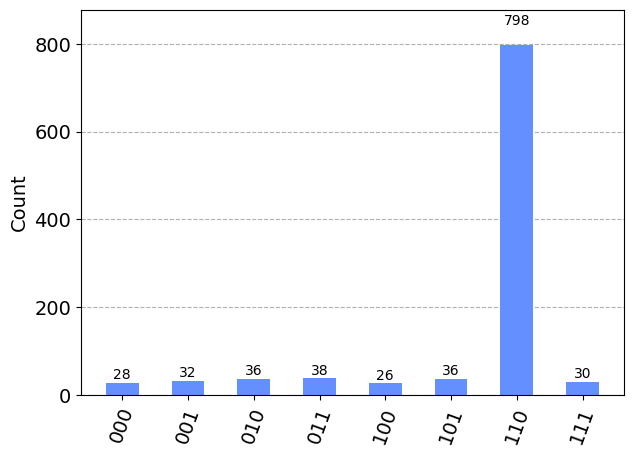

In [38]:
# Simulate, measure and visualize
sim = AerSimulator()
grover_circuit_1_compiled = transpile(grover_circuit_1, sim)
result = sim.run(grover_circuit_1_compiled,shots=1024).result() # Do the simulation and return the result
counts = result.get_counts(grover_circuit_1_compiled)
print(counts)
plot_histogram(counts)

# Problem 4(c)

# What can be expected for this?
## -------------------------------
## Grover's algorithm can be generalized for cases where the search string is more than 1. As the number of elements which cause the f(x) to return 1 and thereby resulting in a phase flip of the element increase, the easier it is for the algorithm to pick out those elemenets. This is exactly what is seen in the resulting simulation shown below. The other elements have almost near zero proababilities and hence are not even being displayed in the plots.

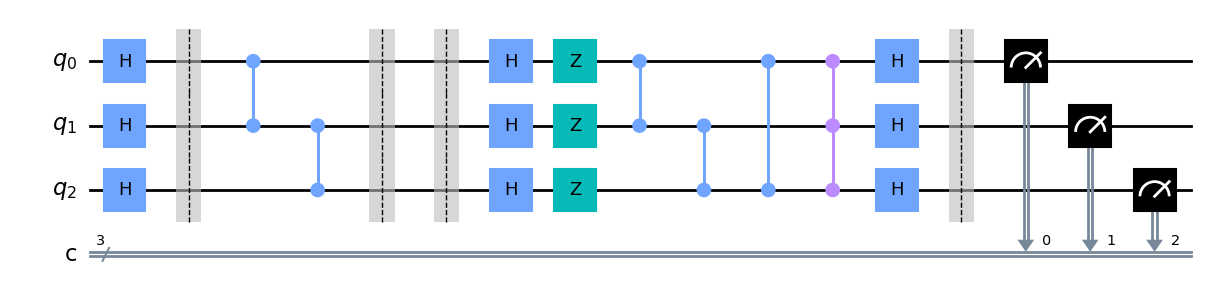

In [41]:
# Actual grover's circuit
grover_circuit_2 = QuantumCircuit(n,n)
grover_circuit_2 = initialize_s(grover_circuit_2, range(n))
grover_circuit_2 = grover_circuit_2.compose(grover_oracle_2)
grover_circuit_2 = grover_circuit_2.compose(grover_diffusion)
grover_circuit_2.measure(range(n), range(n))
grover_circuit_2.draw()

{'011': 49917, '110': 50083}


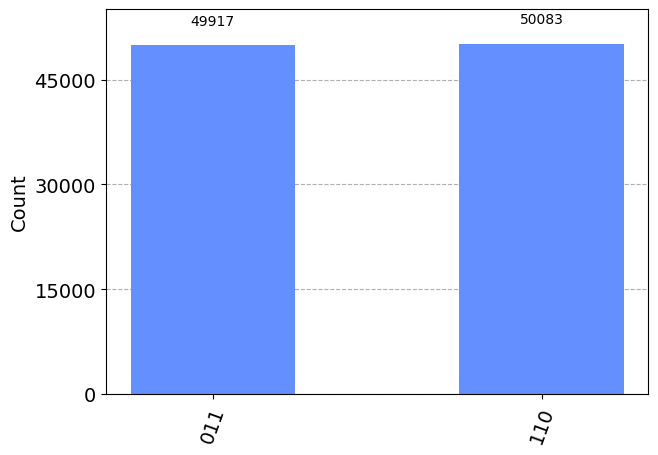

In [42]:
# Simulate, measure and visualize
sim = AerSimulator()
grover_circuit_2_compiled = transpile(grover_circuit_2, sim)
result = sim.run(grover_circuit_2_compiled,shots=100000).result() # Do the simulation and return the result
counts = result.get_counts(grover_circuit_2_compiled)
print(counts)
plot_histogram(counts)